# <a name="0">Default of Credit Card Clients</a>

#### In this notebook, we will build, train, tune, and evaluate ML model to predict if the client will default the payment or not.

#### Here are the main steps we will go through:

<a href="#1">1.Get the data</a><br>
<a href="#2">2.Discover and visualize the data to gain insights</a><br>
<a href="#3">3.Prepare the data for Machine Learning algorithms</a><br>
<a href="#4">4.Select a model and train it</a><br>
<a href="#5">5.Fine-tune your model</a><br>
<a href="#6">6.Deploy the new trained model</a><br>


In [51]:
# modules we'll use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

## <a name="1">1. Get the data</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [2]:
clients = pd.read_excel("default of credit card clients.xls", header=1)
print('The shape of the dataset is:', clients.shape)

The shape of the dataset is: (30000, 25)


## <a name="2">2. Discover and visualize the data to gain insights</a>
(<a href="#0">Go to top</a>)

**This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients from April 2005 to September 2005 (Kaggle Data Set).**

**ID**: ID of each client<br>
**LIMIT_BAL**: Amount of given credit in NT dollars<br>
**SEX**: Gender (1=male, 2=female)<br>
**EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others)<br>
**MARRIAGE**: Marital status (1=married, 2=single, 3=others)<br>
**AGE**: Age in years<br>
**PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
**PAY_2**: Repayment status in August, 2005 (scale same as above)<br>
**PAY_3**: Repayment status in July, 2005 (scale same as above)<br>
**PAY_4**: Repayment status in June, 2005 (scale same as above)<br>
**PAY_5**: Repayment status in May, 2005 (scale same as above)<br>
**PAY_6**: Repayment status in April, 2005 (scale same as above)<br>
**BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)<br>
**BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)<br>
**BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)<br>
**BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)<br>
**BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)<br>
**BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)<br>
**PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)<br>
**PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)<br>
**PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)<br>
**PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)<br>
**PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)<br>
**PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)<br>
**default payment next month**: Default payment (1=yes, 0=no)

In [3]:
pd.options.display.max_columns = None

In [4]:
clients.head(10)

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female       university  married   24      2      2     -1   
1   2     120000  female       university   single   26     -1      2      0   
2   3      90000  female       university   single   34      0      0      0   
3   4      50000  female       university  married   37      0      0      0   
4   5      50000    male       university  married   57     -1      0     -1   
5   6      50000    male  graduate school   single   37      0      0      0   
6   7     500000    male  graduate school   single   29      0      0      0   
7   8     100000  female       university   single   23      0     -1     -1   
8   9     140000  female           others  married   28      0      0      2   
9  10      20000    male      high school   single   35     -2     -2     -2   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -1     -2     -2       3913       3102        689          0          0   
1      0      0      2       2682       1725       2682       3272       3455   
2      0      0      0      29239      14027      13559      14331      14948   
3      0      0      0      46990      48233      49291      28314      28959   
4      0      0      0       8617       5670      35835      20940      19146   
5      0      0      0      64400      57069      57608      19394      19619   
6      0      0      0     367965     412023     445007     542653     483003   
7      0      0     -1      11876        380        601        221       -159   
8      0      0      0      11285      14096      12108      12211      11793   
9     -2     -1     -1          0          0          0          0      13007   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   
5      20024      2500      1815       657      1000      1000       800   
6     473944     55000     40000     38000     20239     13750     13770   
7        567       380       601         0       581      1687      1542   
8       3719      3329         0       432      1000      1000      1000   
9      13912         0         0         0     13007      1122         0   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0

In [5]:
print('The shape of the dataset is:', clients.shape)

The shape of the dataset is: (30000, 25)


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [7]:
clients.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         5
MARRIAGE                          3
AGE                              63
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [8]:
clients.isnull().sum(axis = 0)

ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     331
MARRIAGE                      323
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

In [9]:
# Frequency tables for each categorical feature
for column in clients.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=clients[column], columns='% observations', normalize='columns')*100)
    
display(pd.crosstab(index=clients['default payment next month'], columns='% observations', normalize='columns')*100)

col_0   % observations
SEX                   
female       60.373333
male         39.626667

col_0            % observations
EDUCATION                      
0                      0.047187
graduate school       35.676969
high school           16.569483
others                 0.417945
university            47.288416

col_0     % observations
MARRIAGE                
0               0.181959
married        46.025542
single         53.792499

col_0                       % observations
default payment next month                
0                                    77.88
1                                    22.12

ID


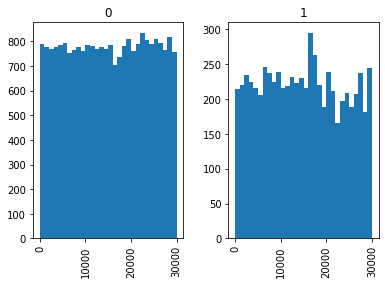

LIMIT_BAL


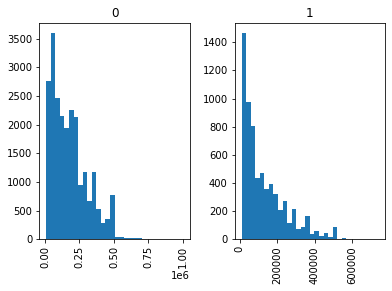

AGE


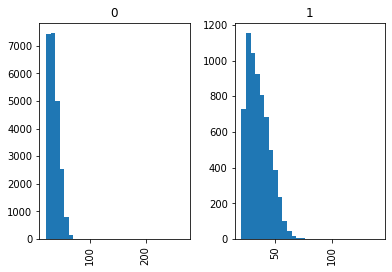

PAY_0


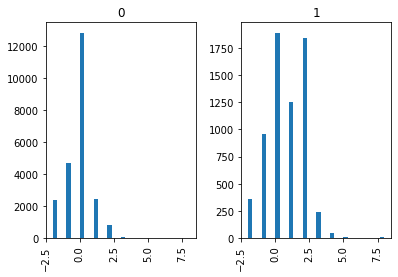

PAY_2


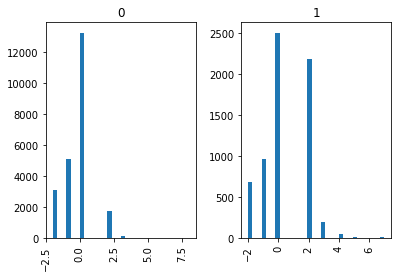

PAY_3


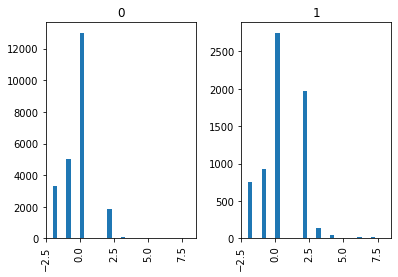

PAY_4


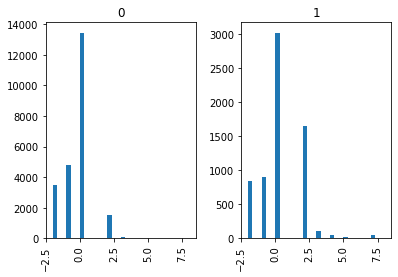

PAY_5


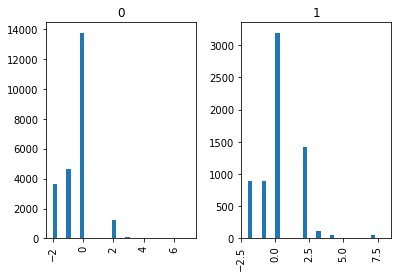

PAY_6


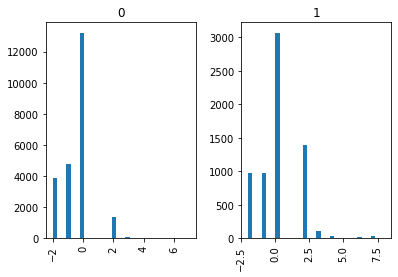

BILL_AMT1


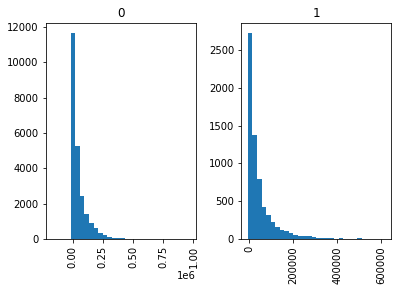

BILL_AMT2


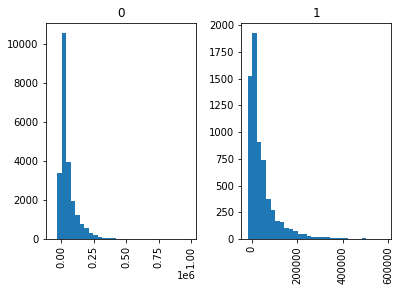

BILL_AMT3


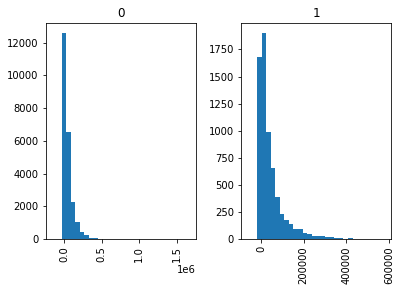

BILL_AMT4


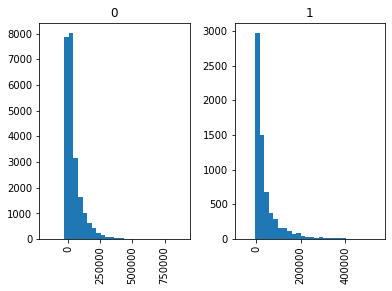

BILL_AMT5


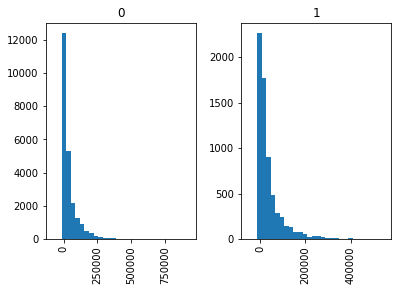

BILL_AMT6


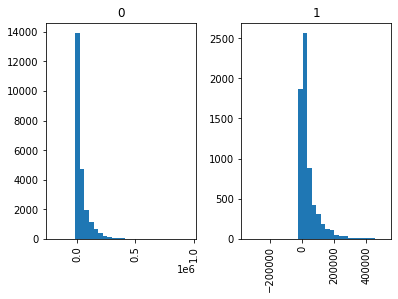

PAY_AMT1


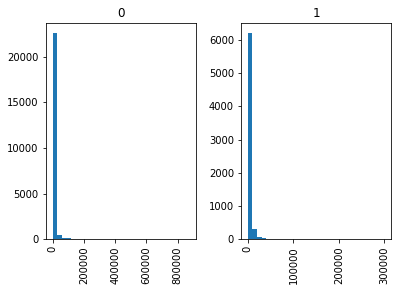

PAY_AMT2


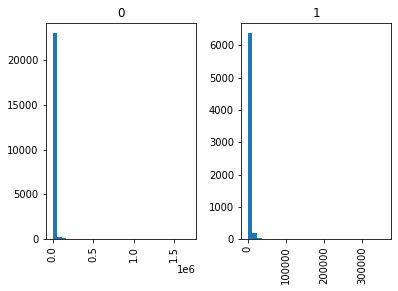

PAY_AMT3


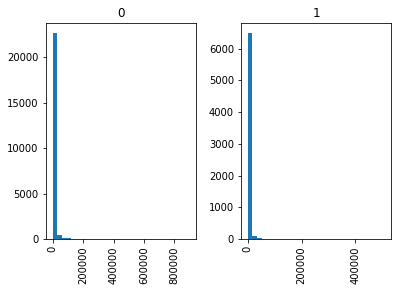

PAY_AMT4


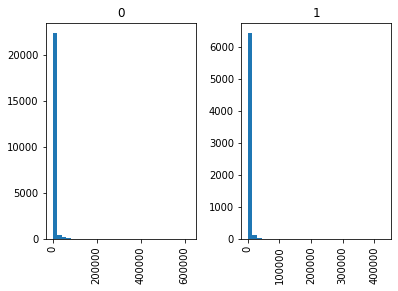

PAY_AMT5


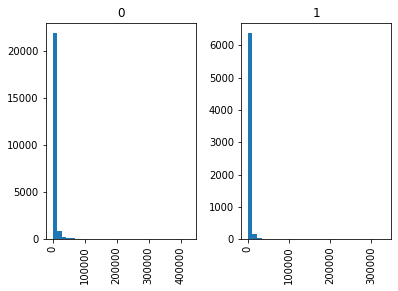

PAY_AMT6


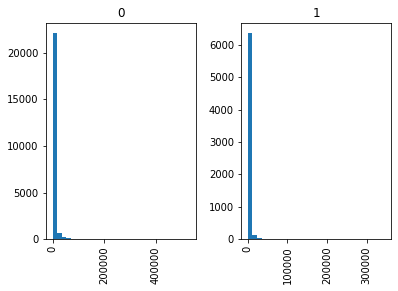

In [10]:
for column in clients.drop(columns=['default payment next month']).select_dtypes(exclude=['object']):
    print(column) 
    hist = clients[[column,'default payment next month']].hist(by='default payment next month', column=column, bins=30, sharey=False) 
    plt.show() 

In [11]:
clients.describe()

ID       LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.518833     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.528019      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000    267.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

           BILL_AMT2     BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count   30000.000000  3.000000e+04   30000.000000   30000.000000   
mean    49179.075167  4.701315e+04   43262.948967   40311.400967   
std     71173.768783  6.934939e+04   64332.856134   60797.155770   
min    -69777.000000 -1.572640e+05 -170000.000000  -81334.000000   
25%      2984.750000  2.666250e+03    2326.750000    1763.000000   
50%     21200.000000  2.008850e+04   19052.000000   18104.500000   
75%     64006.250000  6.016475e+04   54506.000000   50190.500000   
max    983931.000000  1.664089e+06  891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   30000.000000   30000.000000  3.000000e+04   30000.00000   
mean    38871.760400    5663.580500  5.921163e+03    5225.68150   
std     59554.107537   16563.280354  2.304087e+04   17606.96147   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1256.000000    1000.000000  8.330000e+02     390.00000   
50%     17071.000000    2100.000000  2.009000e+03    1800.00000   
75%     49198.250000    5006.000000  5.000000e+03    4505.00000   
max    961664.000000  873552.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count   30000.000000   30000.000000   30000.000000                30000.000000  
mean     4826.076867    4799.387633    5215.502567                    0.221200  
std     15666.159744   15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000       0.000000                    0.000000  
25%       296.000000     252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4013.250000    4031.500000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000

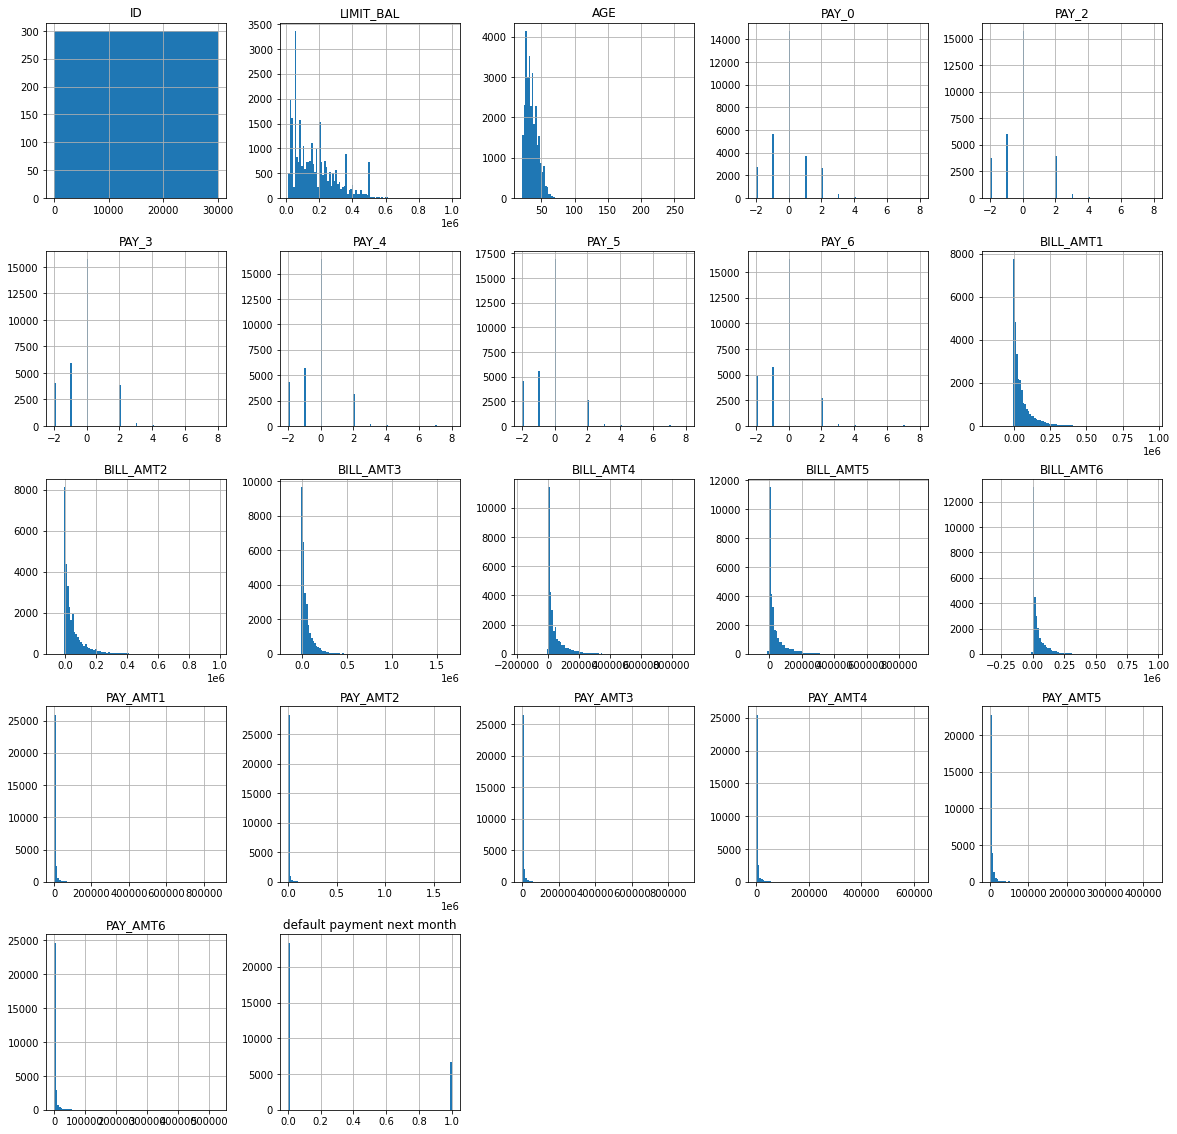

In [12]:
hist = clients.hist(bins=100, sharey=False, figsize=(20,20))

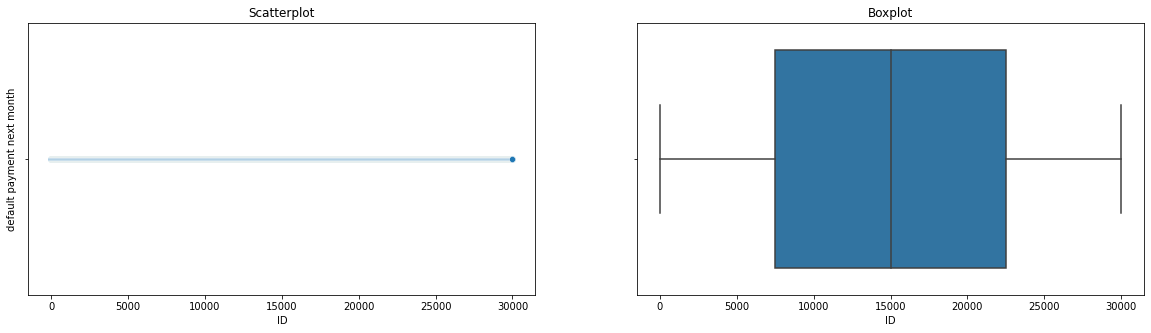

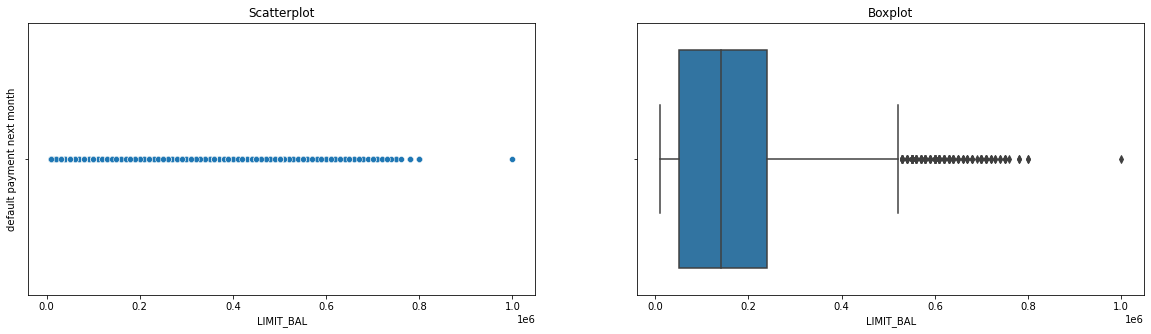

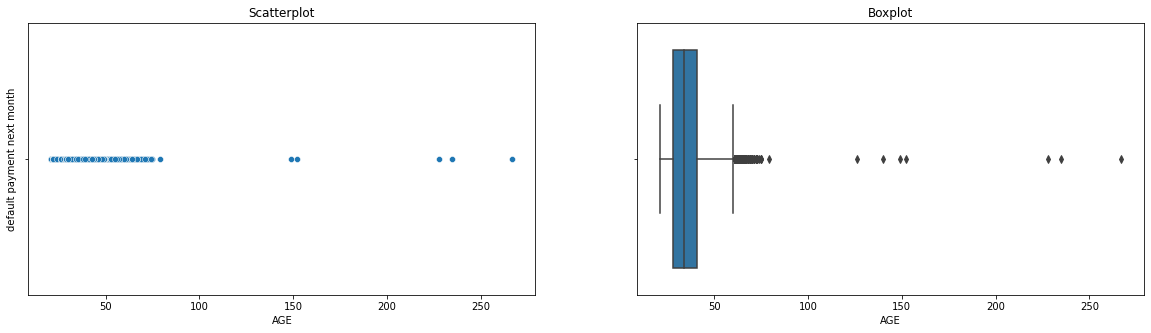

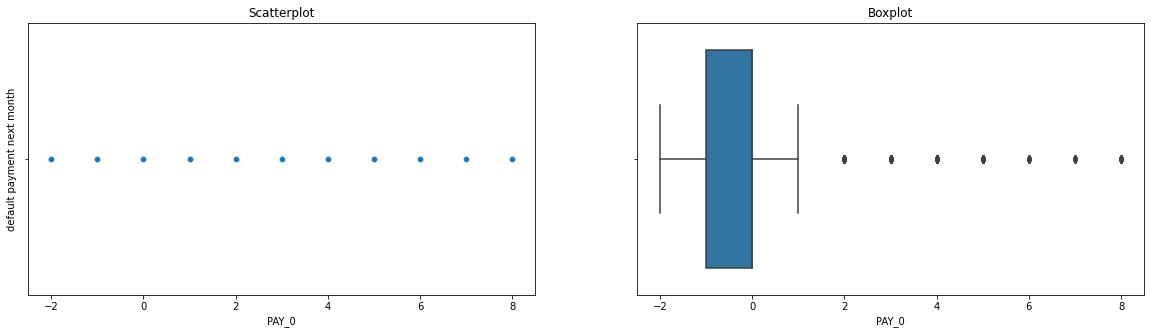

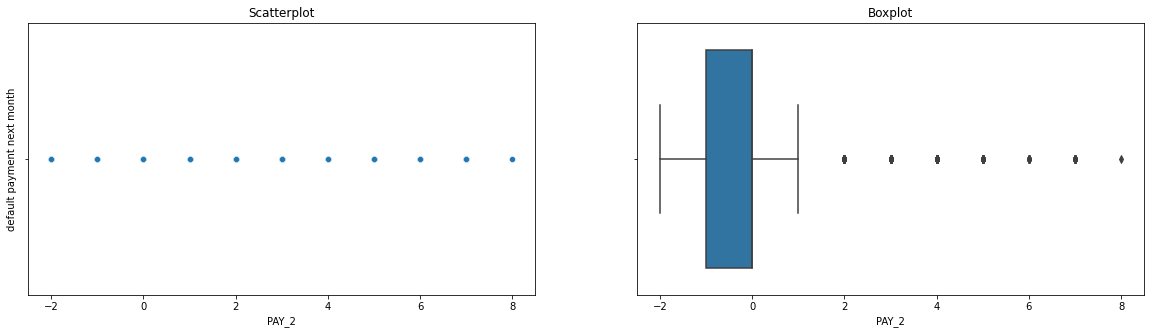

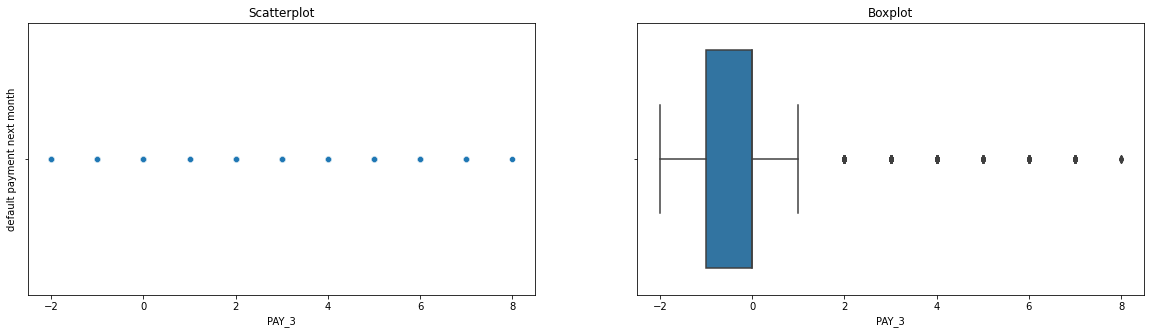

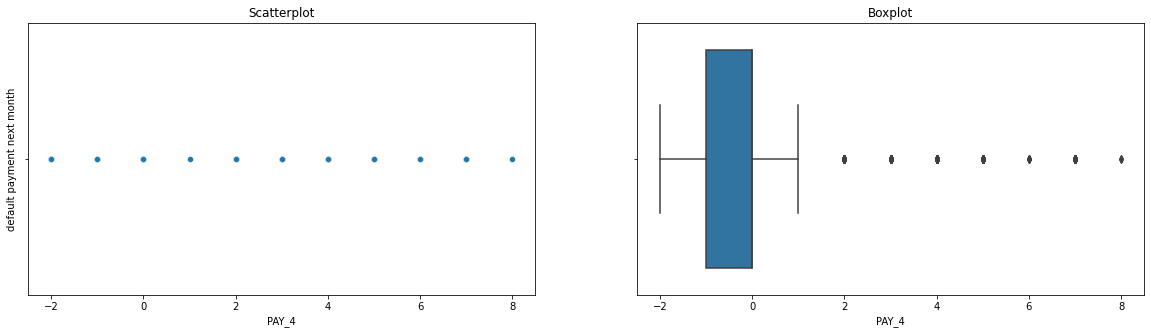

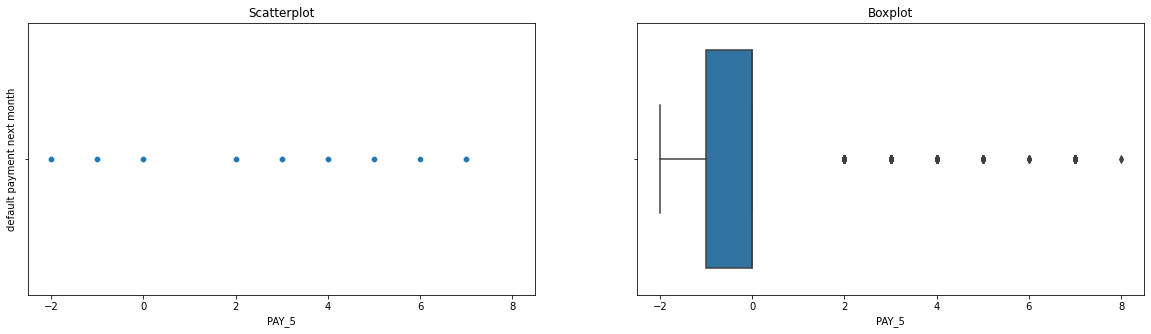

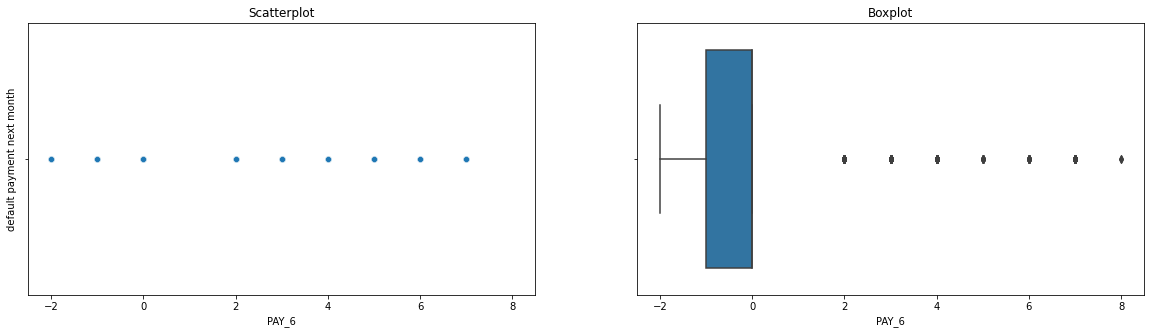

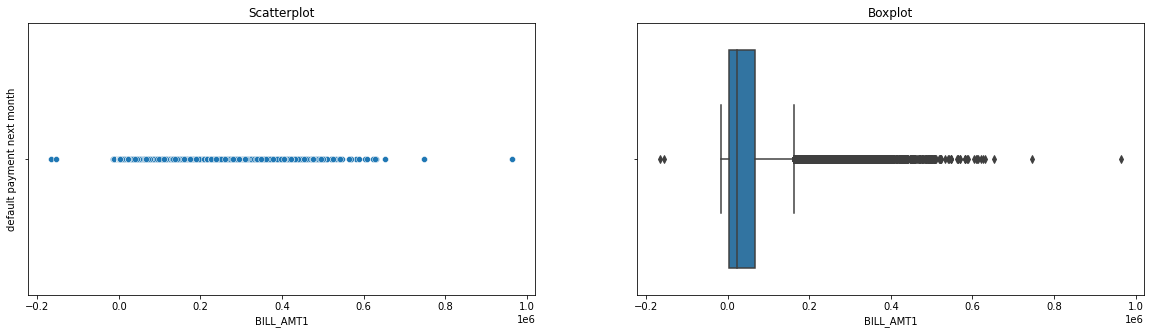

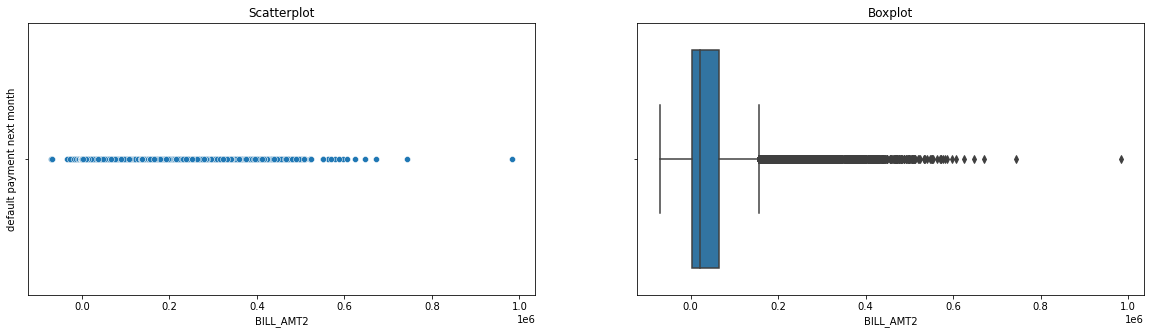

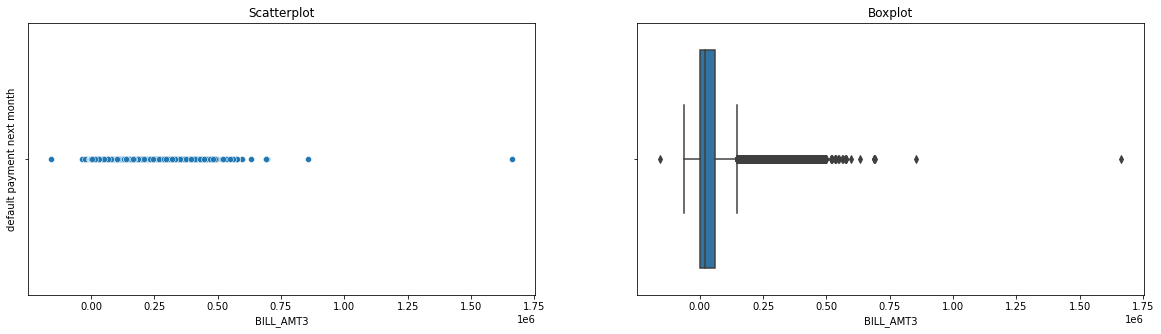

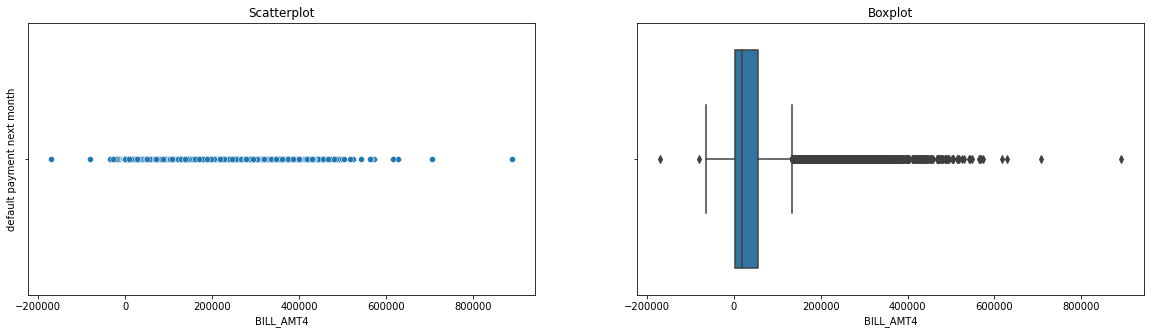

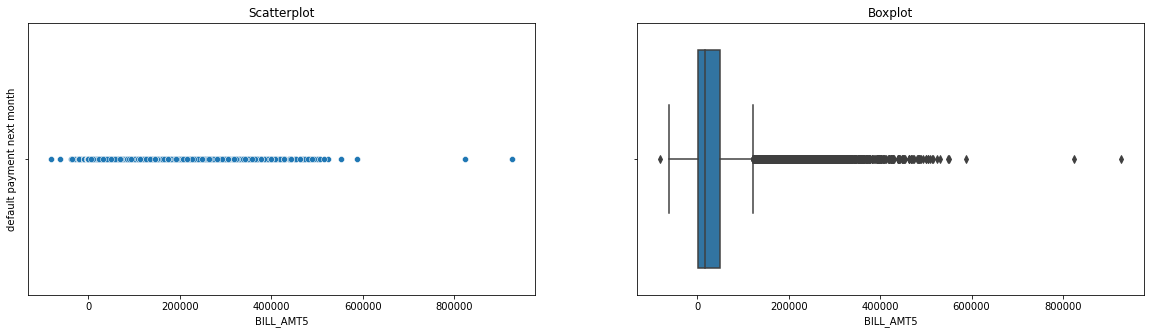

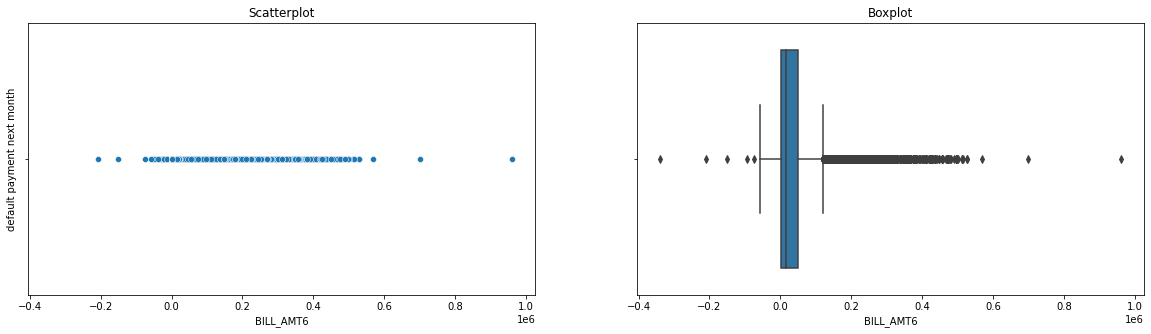

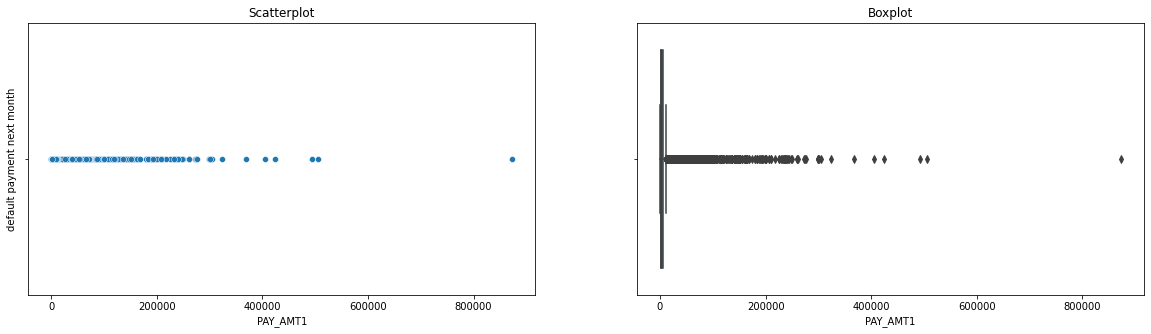

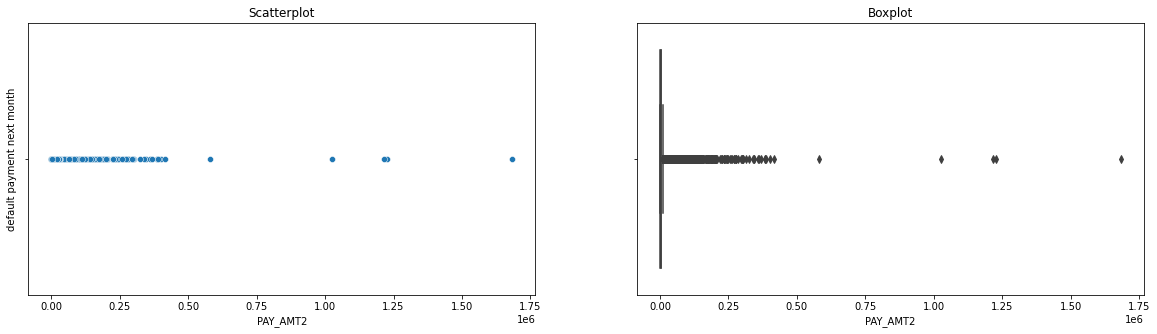

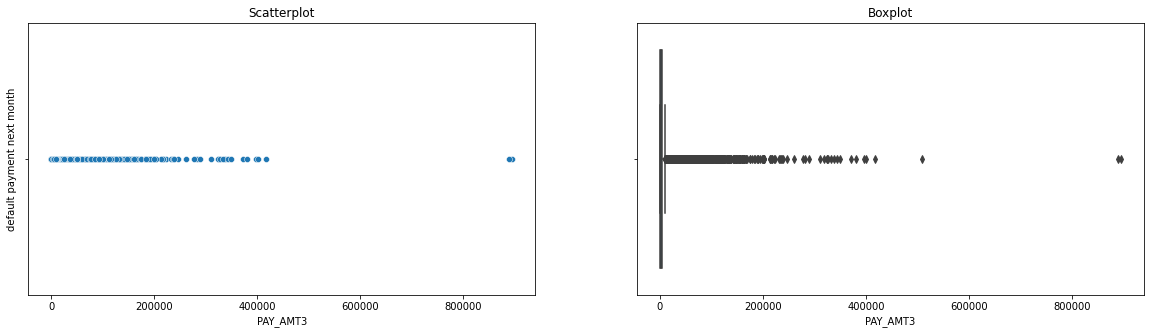

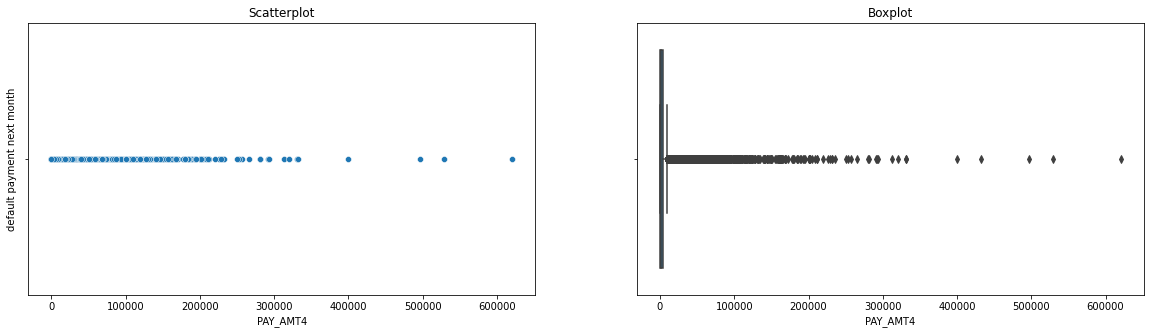

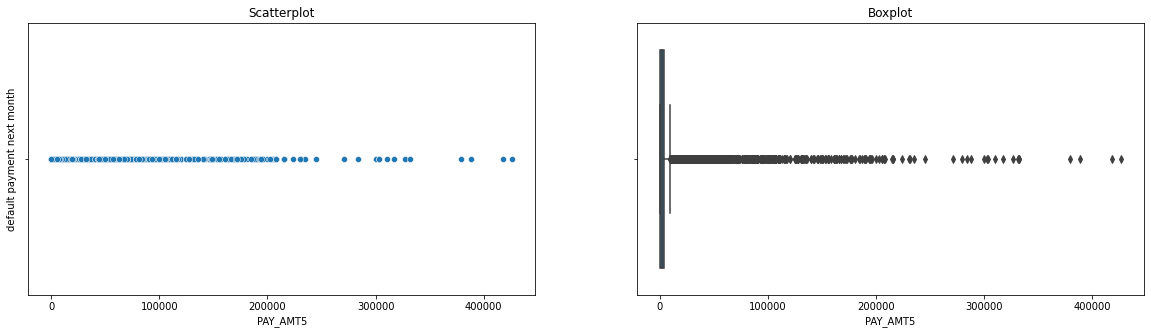

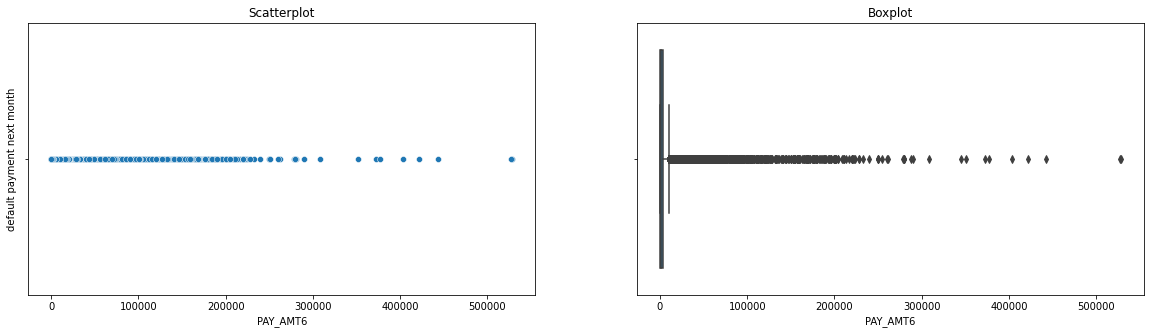

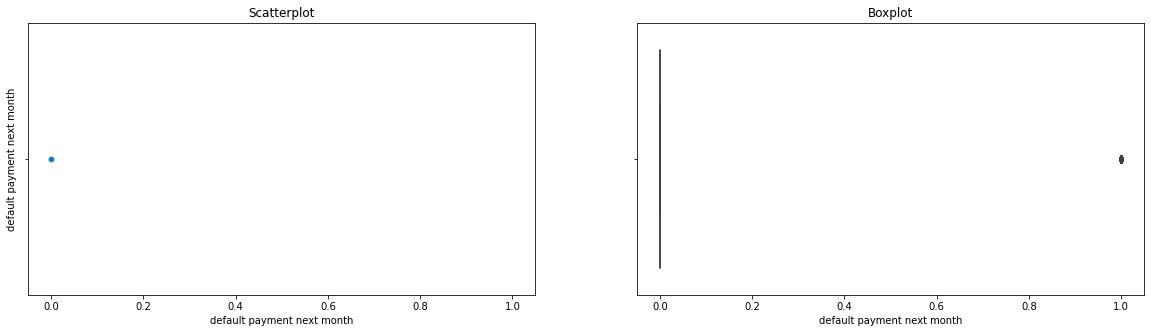

In [13]:
for column in clients.select_dtypes(exclude=['object']).columns:
    fig, axes = plt.subplots(ncols=2 , figsize=(20,5),sharey=True)
    sns.scatterplot(data=clients, x=column, y="default payment next month", ax=axes[0])
    sns.boxplot(x=clients[column], ax=axes[1])
    axes[0].set_title('Scatterplot')
    axes[1].set_title('Boxplot')
    plt.show()

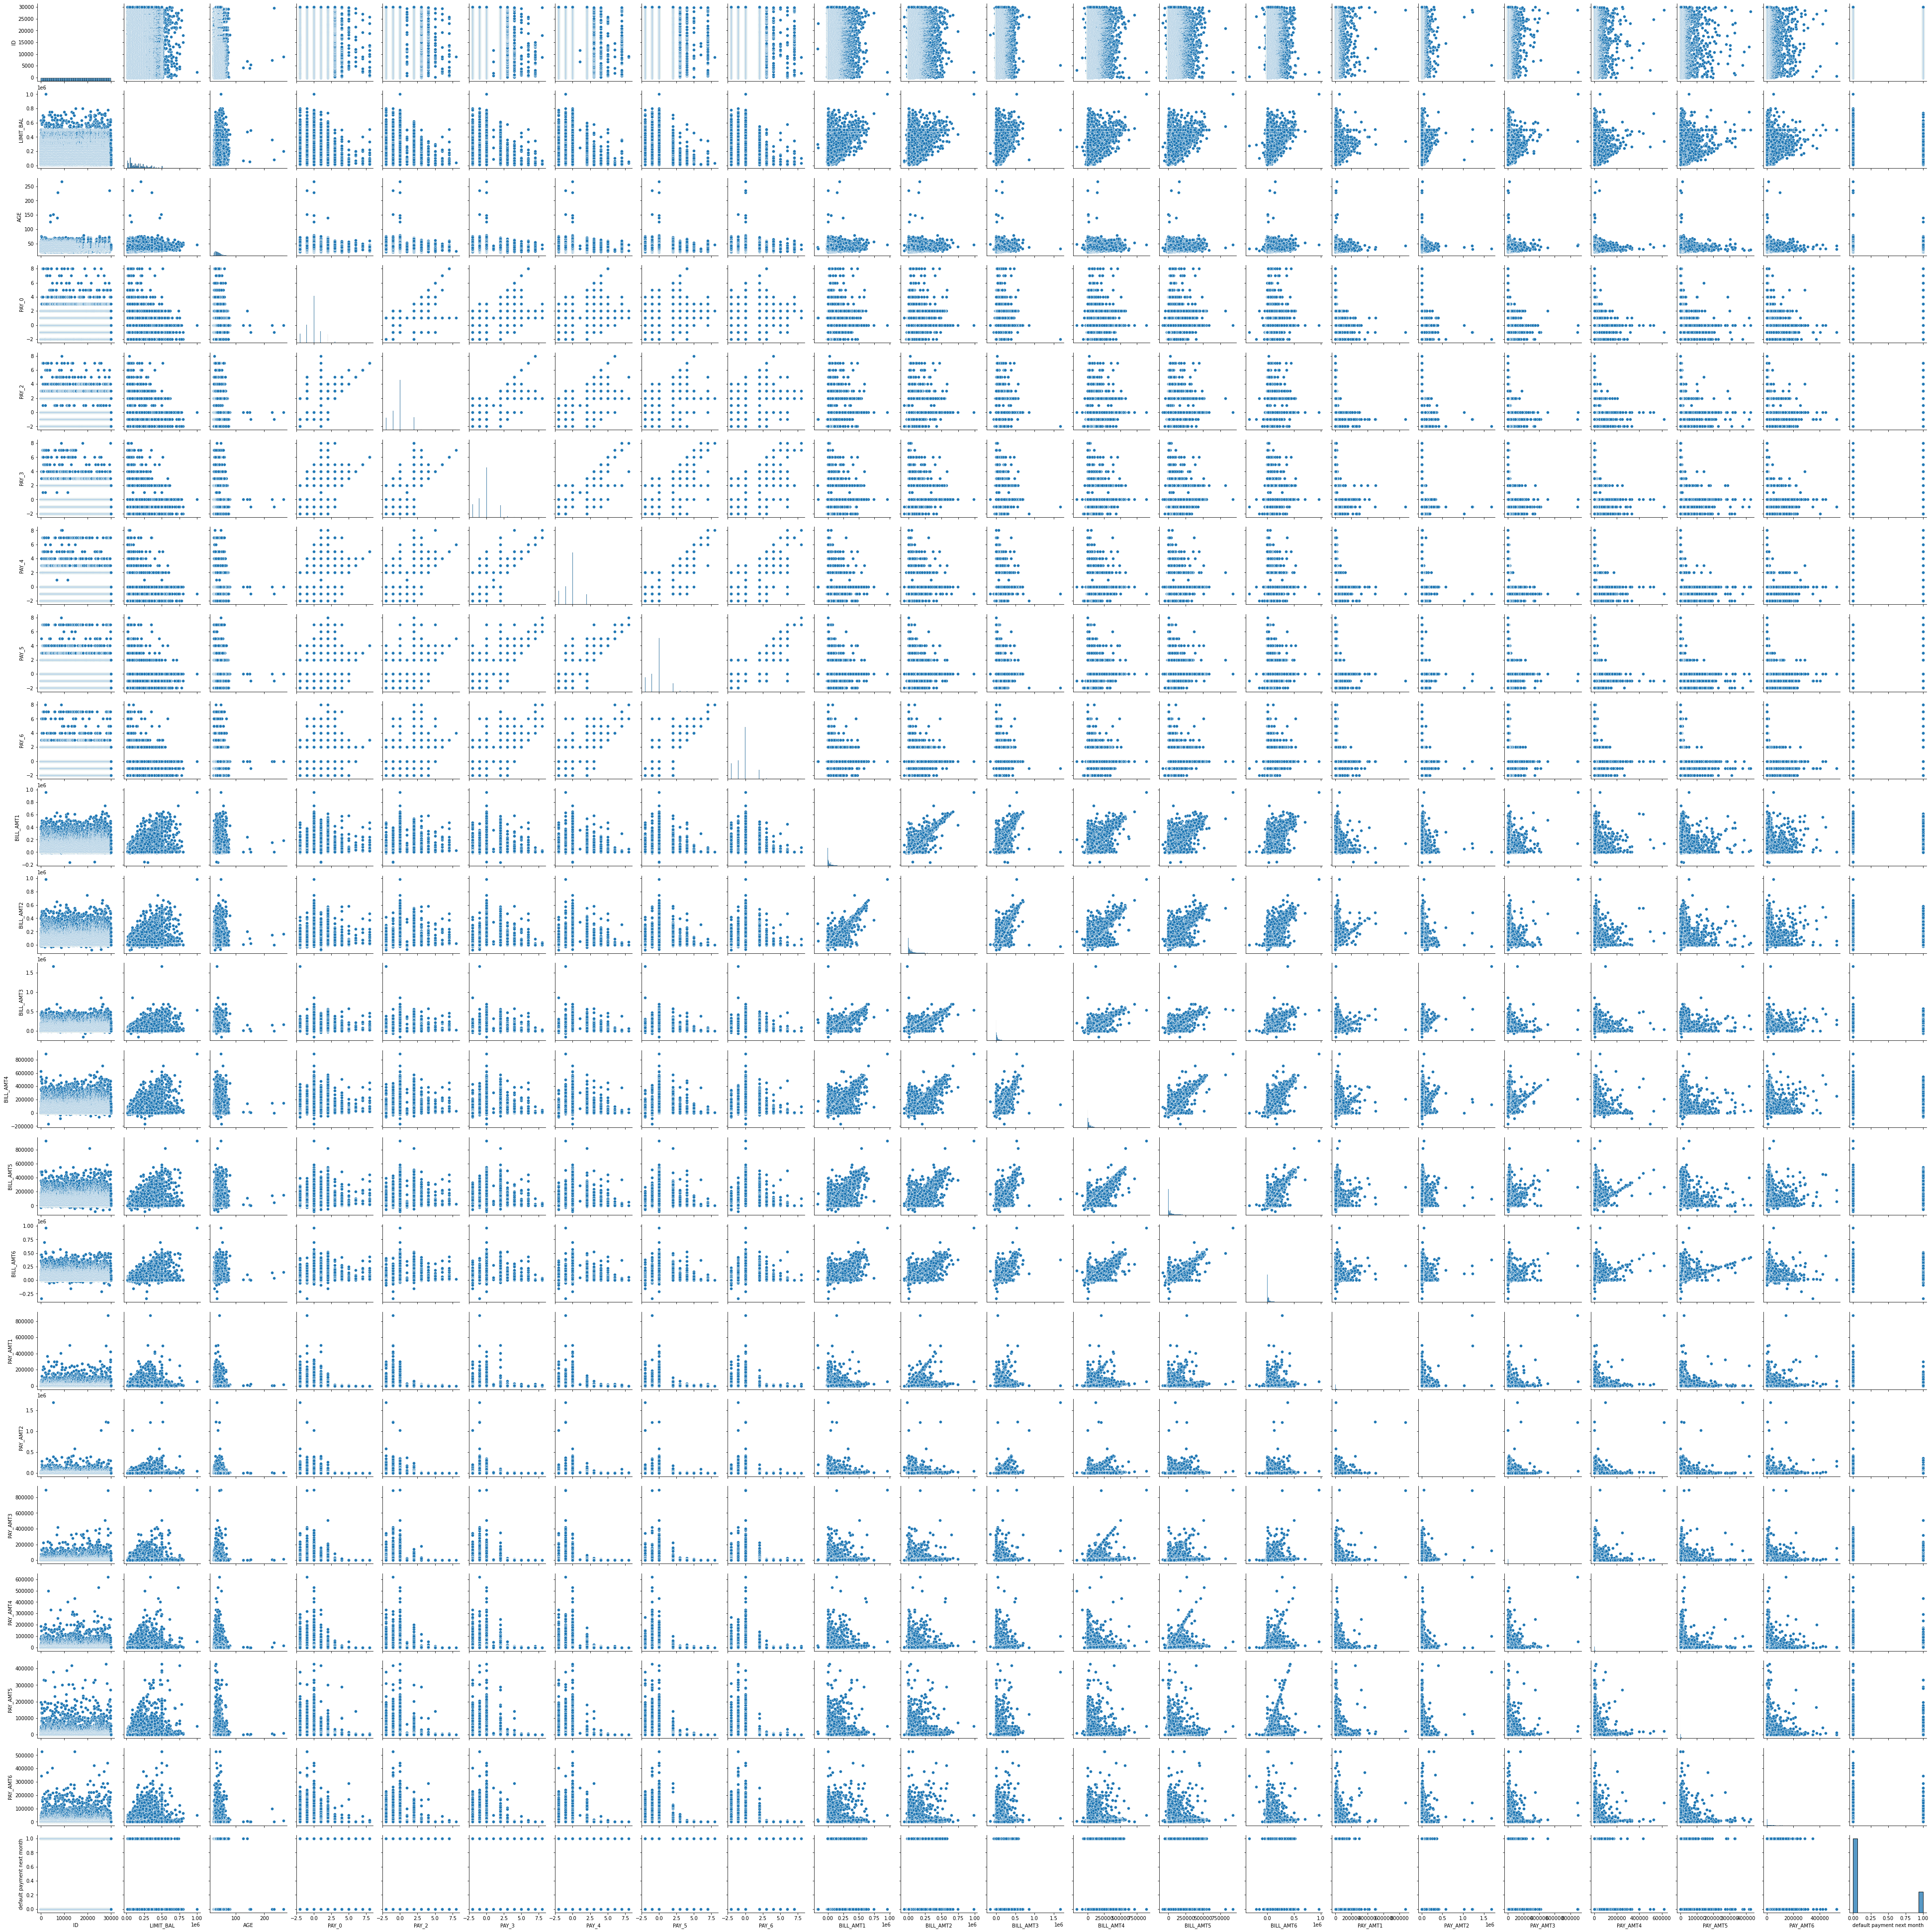

In [14]:
sns.pairplot(clients)

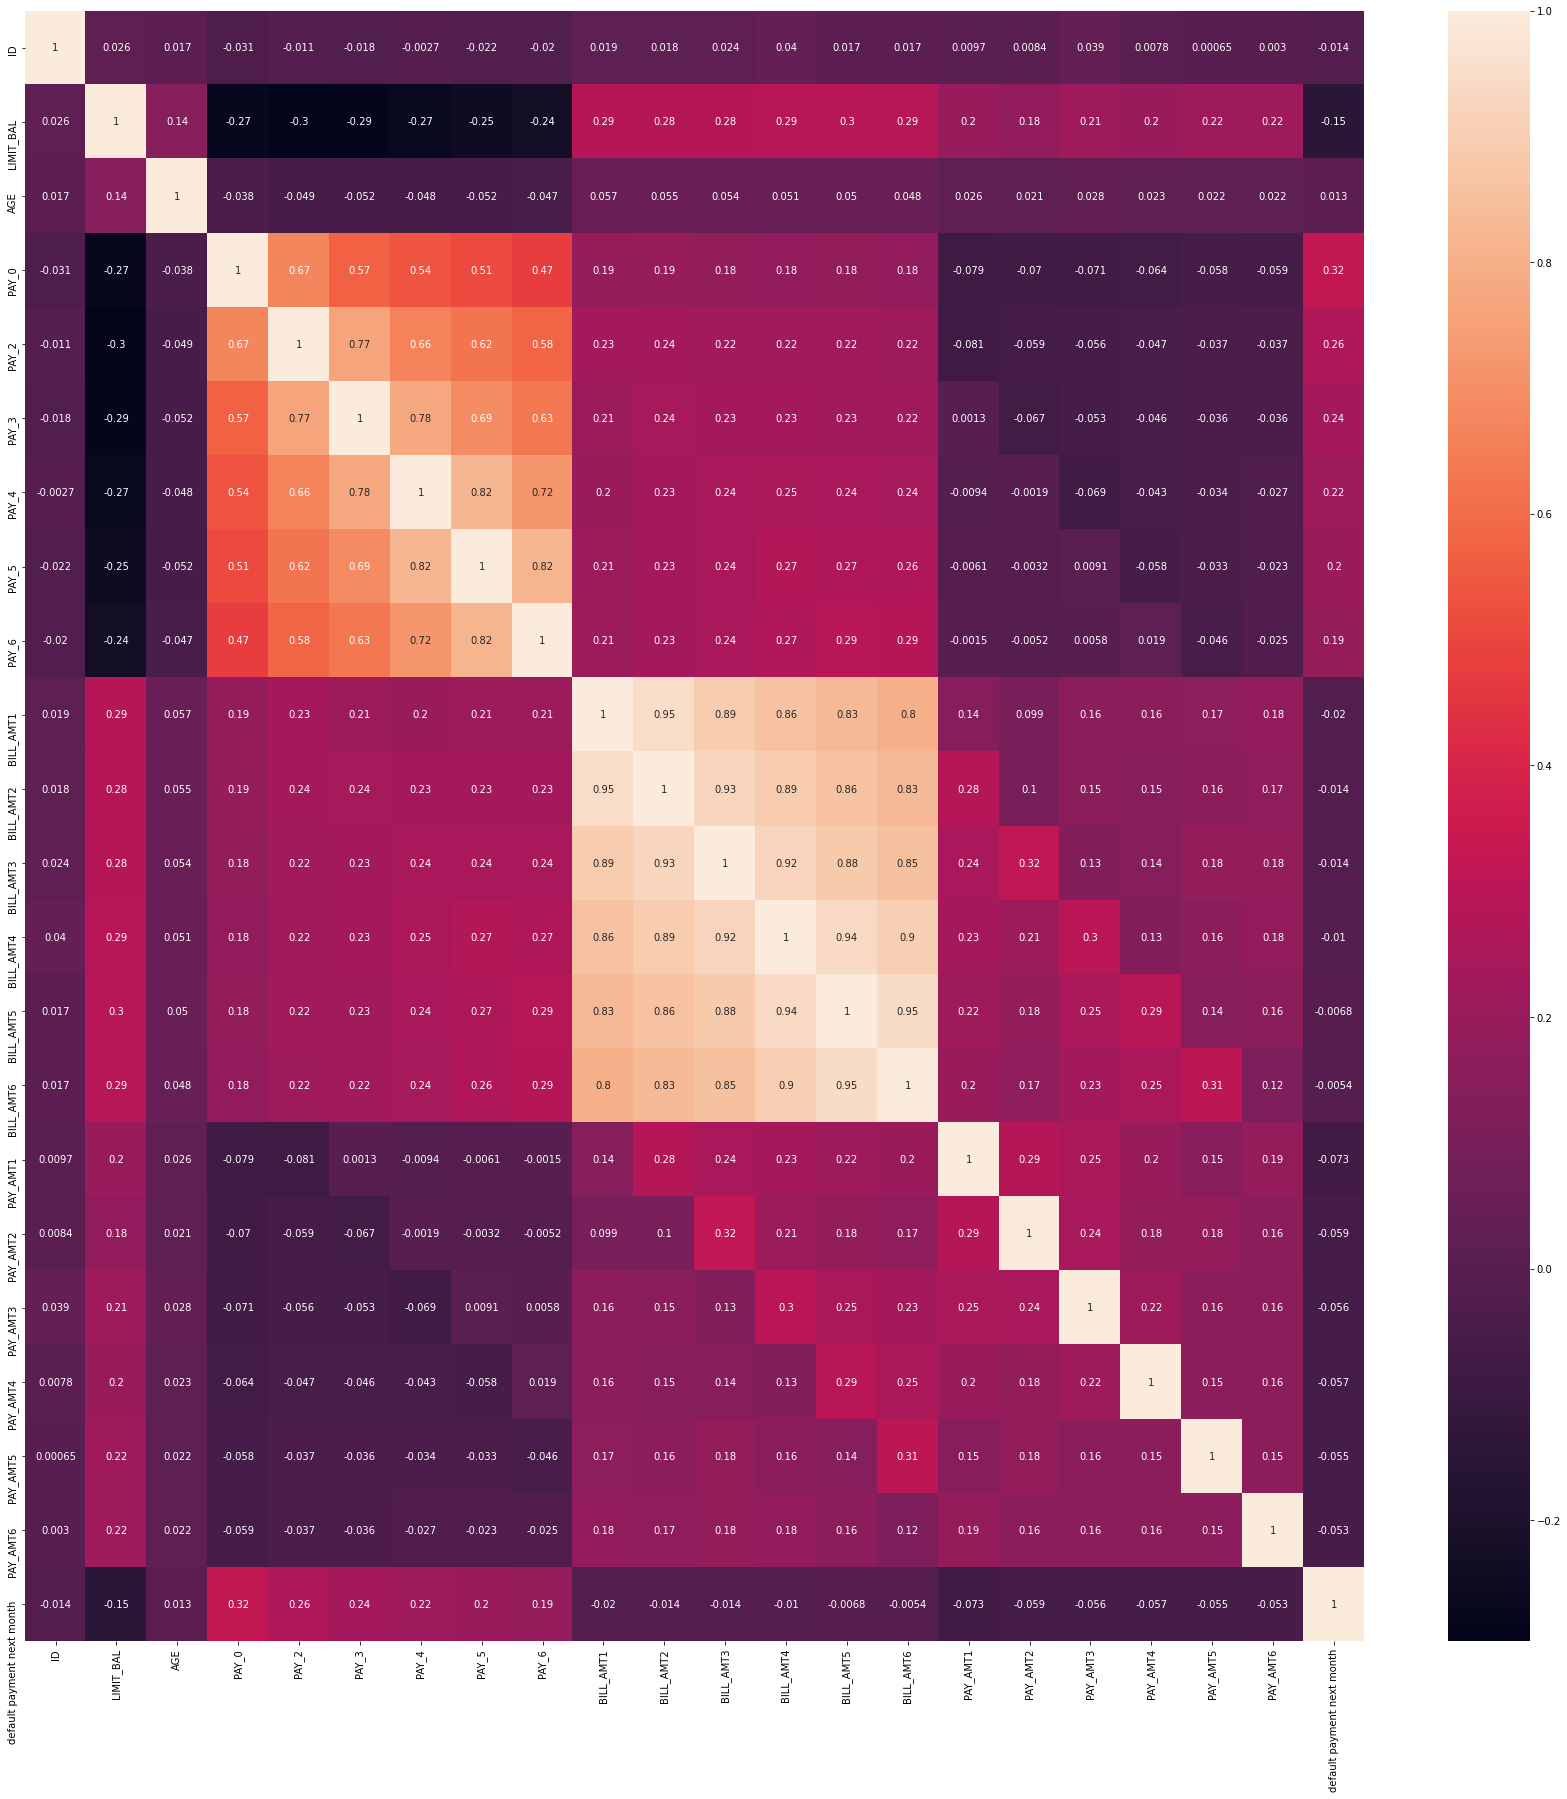

In [15]:
f, ax = plt.subplots(figsize=(30, 30))
corr = clients.corr()
mp = sns.heatmap(corr, ax=ax, annot = True)

## <a name="3">3. Prepare the data for Machine Learning algorithms</a>
(<a href="#0">Go to top</a>)

In [21]:
#drop unused columns
clients.drop(columns=['ID'], inplace=True)

In [22]:
#rename the target column and PAY_0 column
clients.rename(columns = {'default payment next month': 'y', 'PAY_0':'PAY_1' }, inplace=True)

In [23]:
clients.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000  female  university  married   24      2      2     -1     -1   
1     120000  female  university   single   26     -1      2      0      0   
2      90000  female  university   single   34      0      0      0      0   
3      50000  female  university  married   37      0      0      0      0   
4      50000    male  university  married   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  y  
0          0         0       689         0         0         0         0  1  
1       3261         0      1000      1000      1000         0      2000  1  
2      15549      1518      1500      1000      1000      1000      5000  0  
3      29547      2000      2019      1200      1100      1069      1000  0  
4      19131      2000     36681     10000      9000       689       679  0

**Impute some values**

In [24]:
clients.EDUCATION.replace({0: 'others', None :'others'}, inplace=True)
clients.MARRIAGE.replace({0: 'single', None :'single'}, inplace=True)

In [25]:
clients.isnull().sum(axis = 0)

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
y            0
dtype: int64

**Encoding Categorical Variables**

In [26]:
clients.SEX = clients.SEX.map({'female':0, 'male':1})
clients.MARRIAGE = clients.MARRIAGE.map({'single':0, 'married':1})

clients = pd.get_dummies(clients)

In [27]:
clients.head()

LIMIT_BAL  SEX  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0      20000    0         1   24      2      2     -1     -1     -2     -2   
1     120000    0         0   26     -1      2      0      0      0      2   
2      90000    0         0   34      0      0      0      0      0      0   
3      50000    0         1   37      0      0      0      0      0      0   
4      50000    1         1   57     -1      0     -1      0      0      0   

   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0       3913       3102        689          0          0          0         0   
1       2682       1725       2682       3272       3455       3261         0   
2      29239      14027      13559      14331      14948      15549      1518   
3      46990      48233      49291      28314      28959      29547      2000   
4       8617       5670      35835      20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  y  \
0       689         0         0         0         0  1   
1      1000      1000      1000         0      2000  1   
2      1500      1000      1000      1000      5000  0   
3      2019      1200      1100      1069      1000  0   
4     36681     10000      9000       689       679  0   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_others  \
0                          0                      0                 0   
1                          0                      0                 0   
2                          0                      0                 0   
3                          0                      0                 0   
4                          0                      0                 0   

   EDUCATION_university  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

**Impute The Outliers**

In [28]:
Q1 = clients.quantile(0.25)
Q3 = clients.quantile(0.75)
IQR = Q3 - Q1
min_outliers = Q1 - 1.5 * IQR
max_outliers = Q3 + 1.5 * IQR

In [29]:
max_outliers

LIMIT_BAL                    525000.000
SEX                               2.500
MARRIAGE                          2.500
AGE                              60.500
PAY_1                             1.500
PAY_2                             1.500
PAY_3                             1.500
PAY_4                             1.500
PAY_5                             1.500
PAY_6                             1.500
BILL_AMT1                    162389.375
BILL_AMT2                    155538.500
BILL_AMT3                    146412.500
BILL_AMT4                    132774.875
BILL_AMT5                    122831.750
BILL_AMT6                    121111.625
PAY_AMT1                      11015.000
PAY_AMT2                      11250.500
PAY_AMT3                      10677.500
PAY_AMT4                       9589.125
PAY_AMT5                       9700.000
PAY_AMT6                       9823.375
y                                 0.000
EDUCATION_graduate school         2.500
EDUCATION_high school             0.000


In [30]:
min_outliers

LIMIT_BAL                   -235000.000
SEX                              -1.500
MARRIAGE                         -1.500
AGE                               8.500
PAY_1                            -2.500
PAY_2                            -2.500
PAY_3                            -2.500
PAY_4                            -2.500
PAY_5                            -2.500
PAY_6                            -2.500
BILL_AMT1                    -91739.625
BILL_AMT2                    -88547.500
BILL_AMT3                    -83581.500
BILL_AMT4                    -75942.125
BILL_AMT5                    -70878.250
BILL_AMT6                    -70657.375
PAY_AMT1                      -5009.000
PAY_AMT2                      -5417.500
PAY_AMT3                      -5782.500
PAY_AMT4                      -5279.875
PAY_AMT5                      -5416.000
PAY_AMT6                      -5705.625
y                                 0.000
EDUCATION_graduate school        -1.500
EDUCATION_high school             0.000


In [31]:
outliers_col = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [32]:
max_outliers2 = pd.Series({'LIMIT_BAL':700000,
                           'AGE':79 ,
                           'BILL_AMT1':500000,
                          'BILL_AMT2':500000,
                          'BILL_AMT3':500000,
                          'BILL_AMT4':500000,
                          'BILL_AMT5':500000,
                          'BILL_AMT6':500000,
                          'PAY_AMT1':500000,
                          'PAY_AMT2':500000,
                          'PAY_AMT3':500000,
                          'PAY_AMT4':500000,
                          'PAY_AMT5':500000,
                          'PAY_AMT6':500000})

In [33]:
min_outliers2 = pd.Series({'LIMIT_BAL':0,
                           'AGE':18 ,
                          'BILL_AMT1':0,
                          'BILL_AMT2':0,
                          'BILL_AMT3':0,
                          'BILL_AMT4':0,
                          'BILL_AMT5':0,
                          'BILL_AMT6':0,
                          'PAY_AMT1':0,
                          'PAY_AMT2':0,
                          'PAY_AMT3':0,
                          'PAY_AMT4':0,
                          'PAY_AMT5':0,
                          'PAY_AMT6':0})

In [34]:
for col in outliers_col:
    clients[col][(clients[col] < min_outliers2[col])|(clients[col] > max_outliers2[col])] = None

<ipython-input-34-3010ccc8cf99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients[col][(clients[col] < min_outliers2[col])|(clients[col] > max_outliers2[col])] = None
<ipython-input-34-3010ccc8cf99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients[col][(clients[col] < min_outliers2[col])|(clients[col] > max_outliers2[col])] = None
<ipython-input-34-3010ccc8cf99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients[co

In [35]:
clients.isnull().sum()

LIMIT_BAL                     23
SEX                            0
MARRIAGE                       0
AGE                            7
PAY_1                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                    635
BILL_AMT2                    706
BILL_AMT3                    678
BILL_AMT4                    695
BILL_AMT5                    669
BILL_AMT6                    697
PAY_AMT1                       2
PAY_AMT2                       5
PAY_AMT3                       3
PAY_AMT4                       2
PAY_AMT5                       0
PAY_AMT6                       2
y                              0
EDUCATION_graduate school      0
EDUCATION_high school          0
EDUCATION_others               0
EDUCATION_university           0
dtype: int64

In [39]:
imputer = KNNImputer(n_neighbors=5)
clients = pd.DataFrame(data=imputer.fit_transform(clients), columns=clients.columns)

In [40]:
scaler = MinMaxScaler()
scaled_clients = scaler.fit_transform(clients)
clients = pd.DataFrame(scaled_clients, columns=clients.columns)

In [41]:
clients.head()

LIMIT_BAL  SEX  MARRIAGE       AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
0   0.014493  0.0       1.0  0.051724    0.4    0.4    0.1    0.1    0.0   
1   0.159420  0.0       0.0  0.086207    0.1    0.4    0.2    0.2    0.2   
2   0.115942  0.0       0.0  0.224138    0.2    0.2    0.2    0.2    0.2   
3   0.057971  0.0       1.0  0.275862    0.2    0.2    0.2    0.2    0.2   
4   0.057971  1.0       1.0  0.620690    0.1    0.2    0.1    0.2    0.2   

   PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0    0.0   0.007835   0.006210   0.001378   0.000000   0.000000   0.000000   
1    0.4   0.005370   0.003454   0.005365   0.006591   0.007007   0.006534   
2    0.2   0.058542   0.028083   0.027121   0.028870   0.030317   0.031154   
3    0.2   0.094083   0.096565   0.098595   0.057039   0.058733   0.059201   
4    0.2   0.017253   0.011352   0.071679   0.042184   0.038831   0.038331   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6    y  \
0  0.000000  0.001658  0.000000  0.000000  0.000000  0.000000  1.0   
1  0.000000  0.002406  0.002395  0.002012  0.000000  0.004515  1.0   
2  0.003077  0.003610  0.002395  0.002012  0.002345  0.011287  0.0   
3  0.004054  0.004859  0.002874  0.002213  0.002506  0.002257  0.0   
4  0.004054  0.088271  0.023947  0.018109  0.001615  0.001533  0.0   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_others  \
0                        0.0                    0.0               0.0   
1                        0.0                    0.0               0.0   
2                        0.0                    0.0               0.0   
3                        0.0                    0.0               0.0   
4                        0.0                    0.0               0.0   

   EDUCATION_university  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

In [46]:
clients.to_csv('modified_clients.csv', index = False)

In [67]:
modified_clients = pd.read_csv('modified_clients.csv')

## <a name="4">4. Select a model and train it</a>
(<a href="#0">Go to top</a>)

In [68]:
np.random.seed(0)

x = modified_clients.drop(columns=['y'])
y = modified_clients['y']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [73]:
def predict(predictor, features, labels):
    """
    predictor : Predictor object of model
    features: Input features to model
    label: Ground truth target values
    """
    predictions = predictor.predict(features)

    # Calculate accuracy
    accuracy = (predictions == labels).sum() / labels.shape[0]
    print(f'Accuracy: {accuracy}')
    
    auc = roc_auc_score(labels, predictions)
    print(f'AUC     : {auc}')
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    
    
    confusion_matrix = pd.crosstab(index=labels, columns=predictions, rownames=['Actual'], colnames=['Predicted']).astype(int)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap="YlGnBu").set_title('Confusion Matrix') 


In [74]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

/home/karim/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:30:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.8865833333333333
AUC     : 0.7716254382831688
Precision: 0.8836118440340076
Recall: 0.5645251919835175
F1_score: 0.6889142857142857


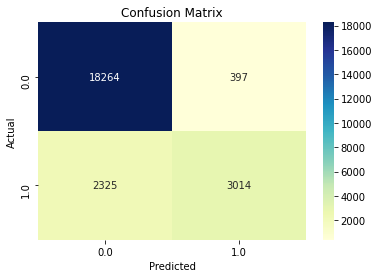

In [75]:
predict(xgb_model, x_train, y_train)

Accuracy: 0.8173333333333334
AUC     : 0.6533491322864351
Precision: 0.6422764227642277
Recall: 0.36294027565084225
F1_score: 0.4637964774951076


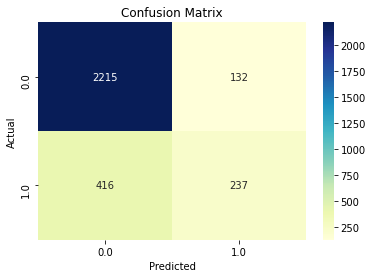

In [76]:
predict(xgb_model, x_val, y_val)

In [78]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

Accuracy: 0.8143333333333334
AUC     : 0.6313650281755957
Precision: 0.68875587858059
Recall: 0.30174189923206596
F1_score: 0.41964053138838237


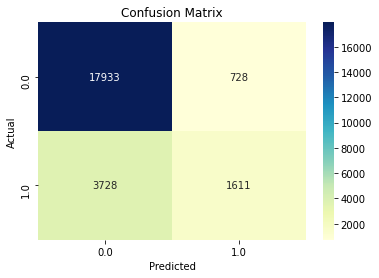

In [79]:
predict(svm_model, x_train, y_train)

Accuracy: 0.817
AUC     : 0.6255031511995046
Precision: 0.6925925925925925
Recall: 0.28637059724349156
F1_score: 0.40520043336944744


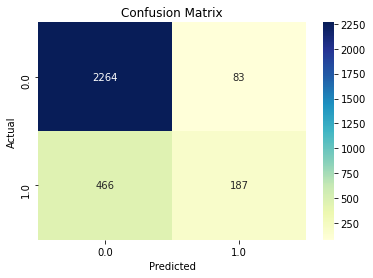

In [80]:
predict(svm_model, x_val, y_val)

# cross validation

## 5. <a name="5">Fine-tune your model</a>
(<a href="#0">Go to top</a>)

## 6. <a name="6">Deploy the new trained model</a>
(<a href="#0">Go to top</a>)